In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Heart_attack_model\heart_attack_prediction\Data\heart_cleaned.csv')

In [26]:
# Separate features (X) and target (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']



In [27]:
# Instantiate the label encoder
labelencoder = LabelEncoder()

# Function to label-encode categorical columns and save encoders
def label_encode_and_save(X, save_path="encoders.pkl"):
    encoders = {}  # Dictionary to save encoders for each column
    for col in X.columns:
        if X[col].dtype == 'object':  # Encode only categorical columns
            encoder = LabelEncoder()
            X[col] = encoder.fit_transform(X[col])
            encoders[col] = encoder  # Save the encoder for this column

    # Save all encoders to a .pkl file
    with open(save_path, 'wb') as f:
        pickle.dump(encoders, f)
    
    return X

# Apply the label encoding and save the encoders
data_encoded = label_encode_and_save(X)

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Vérifiez si la cible est continue
print("Checking the target variable type...")
print(y_train[:10])  # Exemple de valeurs cibles

if np.issubdtype(y_train.dtype, np.number) and not np.array_equal(y_train, y_train.astype(int)):
    print("The target variable is continuous. Discretizing into classes...")
    
    # Discrétisation en classes (par exemple, 3 classes)
    y_train_discrete = pd.cut(y_train, bins=3, labels=[0, 1, 2])
    y_test_discrete = pd.cut(y_test, bins=3, labels=[0, 1, 2])
else:
    print("The target variable is already discrete.")
    y_train_discrete = y_train
    y_test_discrete = y_test

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Entraînement et évaluation
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    try:
        model.fit(X_train_scaled, y_train_discrete)  # Entraîner
        y_pred = model.predict(X_test_scaled)  # Prédire
        acc = accuracy_score(y_test_discrete, y_pred)  # Calculer l'accuracy
        results.append({'Model': model_name, 'Accuracy': acc})
        
        print(f"{model_name}: Accuracy = {acc:.4f}")
        print(classification_report(y_test_discrete, y_pred))
    except Exception as e:
        print(f"Error training {model_name}: {e}")

# Résultats sous forme de tableau
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)




Checking the target variable type...
795    0
25     0
84     1
10     0
344    1
254    1
398    1
244    1
621    1
118    0
Name: HeartDisease, dtype: int64
The target variable is already discrete.

Training Logistic Regression...
Logistic Regression: Accuracy = 0.8478
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Training KNN...
KNN: Accuracy = 0.8478
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Training SVM...
SVM: Accuracy = 

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

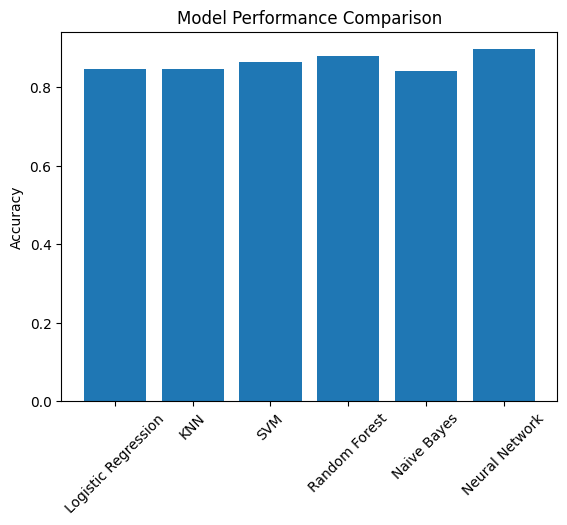

In [31]:
import matplotlib.pyplot as plt

# Plot results
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [32]:
# save best model to pickel file

# Choose the best model

best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Save the best model to a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved to 'best_model.pkl'")

Best model 'Neural Network' saved to 'best_model.pkl'
